In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import imageio
import itertools
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
import networkx as nx 
import numpy as np
import os
import pandas as pd
import requests 
import seaborn as sns
import seaborn.objects as so
import squarify

from bs4 import BeautifulSoup
from io import BytesIO, StringIO
from IPython.display import Image, display
from matplotlib.ticker import FuncFormatter
from networkx.algorithms.community import louvain_communities
from pathlib import Path
from sklearn.metrics.pairwise import cosine_similarity 

In [2]:
# Modulo para obtención de los datos
import conjunto_de_datos as cdd

1. Procesando regiones, subregiones y códigos de países...
Operación finalizada.
2. Procesando ubicaciones...
Operación finalizada.
3. Procesando datos de población...
Operación finalizada.
4. Procesando datos migratorios...
Operación finalizada.
5. Integrando los datos...
Operación finalizada.

Datos disponibles
-----------------
• df_m49: códigos y clasificaciones de países, e indicadores estructurales.
• df_poblaciones: población por país en los años con datos migratorios.
• df_coordenadas: centroides geográficos de cada país.
• df_migras_original: datos migratorios en bruto.
• df_migraciones: datos migratorios de 196 países.
• df_migras_90_24: reúne los datos anteriores.


# M49

In [3]:
cdd.df_m49.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   cod_m49             196 non-null    int64 
 1   iso2_m49            196 non-null    object
 2   iso3_m49            196 non-null    object
 3   pais_ES             196 non-null    object
 4   region_ES           196 non-null    object
 5   subregion_ES        196 non-null    object
 6   pais_EN             196 non-null    object
 7   region_EN           196 non-null    object
 8   subregion_EN        196 non-null    object
 9   menos_desarrollado  196 non-null    bool  
 10  sin_litoral         196 non-null    bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 14.3+ KB


# Población

In [4]:
cdd.df_poblaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cod_pobla   1568 non-null   int64 
 1   iso3_pobla  1568 non-null   object
 2   año_pobla   1568 non-null   int64 
 3   poblacion   1568 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 49.1+ KB


# Coordenadas

In [5]:
cdd.df_coordenadas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cod_coord    196 non-null    int64  
 1   iso3_coord   196 non-null    object 
 2   estatus_geo  196 non-null    object 
 3   lon          196 non-null    float64
 4   lat          196 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.8+ KB


# Datos originales de migraciones

In [6]:
cdd.df_migras_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28030 entries, 0 to 28029
Data columns (total 15 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Index                                                      28030 non-null  object 
 1   Region, development group, country or area of destination  28030 non-null  object 
 2   Coverage                                                   2416 non-null   object 
 3   Data type                                                  17163 non-null  object 
 4   Location code of destination                               28030 non-null  object 
 5   Region, development group, country or area of origin       28030 non-null  object 
 6   Location code of origin                                    28030 non-null  object 
 7   1990                                                       28029 non-null  object 
 8   1995.0

# Datos acotados de migraciones (196 países)

In [7]:
cdd.df_migraciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62604 entries, 0 to 62603
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cod_orig    62604 non-null  int64 
 1   iso3_orig   62604 non-null  object
 2   origen_ES   62604 non-null  object
 3   origen_EN   62604 non-null  object
 4   cod_des     62604 non-null  int64 
 5   iso3_des    62604 non-null  object
 6   destino_ES  62604 non-null  object
 7   destino_EN  62604 non-null  object
 8   año         62604 non-null  int64 
 9   migrantes   62604 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 4.8+ MB


# Tabla con todos los datos anteriores (196 países)

In [8]:
cdd.df_migras_90_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62604 entries, 0 to 62603
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cod_orig           62604 non-null  int64  
 1   iso2_orig          62604 non-null  object 
 2   iso3_orig          62604 non-null  object 
 3   origen_ES          62604 non-null  object 
 4   origen_EN          62604 non-null  object 
 5   region_orig_ES     62604 non-null  object 
 6   region_orig_EN     62604 non-null  object 
 7   subregion_orig_ES  62604 non-null  object 
 8   subregion_orig_EN  62604 non-null  object 
 9   poblacion_orig     62604 non-null  int64  
 10  menos_desarr_orig  62604 non-null  bool   
 11  sin_litoral_orig   62604 non-null  bool   
 12  lon_orig           62604 non-null  float64
 13  lat_orig           62604 non-null  float64
 14  cod_des            62604 non-null  int64  
 15  iso2_des           62604 non-null  object 
 16  iso3_des           626

# **Red de prueba**

La red muestra los tres destinos principales de los **países que explican el 90% de la migración en 2024**.

### Selección de datos

In [9]:
# Filtrado de datos
# Umbral de explicación de datos
umbral_pct = 91

# Solo las del 2024
df_migraciones_24 = (
    cdd.df_migras_90_24[cdd.df_migras_90_24.año == 2024]
)

columnas_de_interes = [
    'iso2_orig',
    'poblacion_orig',
    'lon_orig',
    'lat_orig',
    'iso2_des',
    'poblacion_des',
    'lon_des',
    'lat_des',
    # 'año',
    'migrantes',
]


# Calculo el total de migrantes que aporto cada pais durante todo el periodo
aporte_por_paises = df_migraciones_24.groupby('iso2_orig', as_index=False)['migrantes'].sum()

# Calculo cuanto representa su aporte con relación al total durante el periodo
total_migrantes_mundial = aporte_por_paises['migrantes'].sum()
aporte_por_paises['pct_aporte'] = (aporte_por_paises['migrantes'] * 100) / total_migrantes_mundial 

# Agrego una columna con la suma acumulada del aporte en porcentaje para poder hacer un corte
aporte_por_paises = (
    aporte_por_paises.sort_values(['pct_aporte'], ascending=[False])
    .reset_index(drop=True)
)
aporte_por_paises['pct_acumulado'] = aporte_por_paises['pct_aporte'].cumsum()

# Me quedo con los paises que expliquen el 90% de los datos
lista_ppales_paises = ( # Lista de países que integrarán las redes
    aporte_por_paises[(aporte_por_paises['pct_acumulado'] < umbral_pct)]['iso2_orig']
    .tolist()
)

# Para cada país en la lista, me quedo con sus tres principales destinos
df_verificacion = pd.DataFrame()
for pais in lista_ppales_paises:
    # Obtengo y ordeno los datos del país
    df_pais = (
        df_migraciones_24[df_migraciones_24['iso2_orig'] == pais]
        .groupby(['iso2_des'], as_index=False)
        .agg( # No incluyo el año porque es solo el 2024
            {
                'iso2_orig':'first',
                'poblacion_orig':'first',
                'lon_orig':'first',
                'lat_orig':'first',
                'iso2_des':'first',
                'poblacion_des':'first',
                'lon_des':'first',
                'lat_des':'first',
                # 'año',
                'migrantes':'sum',
            } 
        )
        .sort_values('migrantes', ascending=False)
        .iloc[0:3, :] # Me quedo con los tres destinos principales
    )
    df_verificacion = pd.concat([df_verificacion, df_pais])

df_verificacion = (
    df_verificacion.sort_values('migrantes', ascending=False)
    .reset_index(drop=True)
)

### Creación de la red

In [10]:
# Creación de la red

# Para normalizar los pesos de las aristas
peso_maximo_arista = df_verificacion['migrantes'].max()
normalizar_arista = lambda peso_original : peso_original * 100 / peso_maximo_arista

# Para normalizar el tamaño de los nodos
# Los máximos y mínimos pueden estar en origen o destino
max_poblacion_orig = df_verificacion['poblacion_orig'].max()
max_poblacion_des = df_verificacion['poblacion_des'].max()
min_poblacion_orig = df_verificacion['poblacion_orig'].min()
min_poblacion_des = df_verificacion['poblacion_des'].min()
tam_min_nodo = min(min_poblacion_orig, min_poblacion_des)
tam_max_nodo = max(max_poblacion_orig, max_poblacion_des)
# La población existe entre 0 y 100
normalizar_nodo = lambda tam_original : tam_original * 100 / tam_max_nodo 


# Instancia del grafo
grafo_verificacion = nx.DiGraph()

# Agrego los vértices y aristas 
for i in range(df_verificacion.shape[0]):
    # Obtengo la fila a ingresar 
    fila = df_verificacion.iloc[i]
    # Obtengo los iso2 de origen y destino
    origen, destino = fila.iloc[0], fila.iloc[4]
    # Cantidad de migrantes
    migrantes = fila.iloc[8] 
    # Coordenadas de los nodos de origen y destino
    x_orig, y_orig, x_des, y_des = fila.iloc[2], fila.iloc[3], fila.iloc[6], fila.iloc[7]
    # Obtengo la problación de origen y destino
    pobla_orig, pobla_des = fila.iloc[1], fila.iloc[5]

    # Agrego la relación entre nodos
    grafo_verificacion.add_edge( 
        origen,
        destino,
        weight = normalizar_arista(migrantes),
    )

    # Obtengo el tamaño de cada nodo (networkx espera área)
    tam_nodo_origen = normalizar_nodo(pobla_orig)
    tam_nodo_destino = normalizar_nodo(pobla_des)
    
    # Si el nodo origen aún no fue ingresado
    if not bool(grafo_verificacion.nodes[origen]):
        grafo_verificacion.add_node( # Nodo origen
            origen,
            pos=(x_orig, y_orig),
            weight=tam_nodo_origen,
        )
    if not bool(grafo_verificacion.nodes[destino]):  
        grafo_verificacion.add_node( # Nodo destino
            destino,
            pos=(x_des, y_des),
            weight=tam_nodo_destino,
        )

### Visualización 

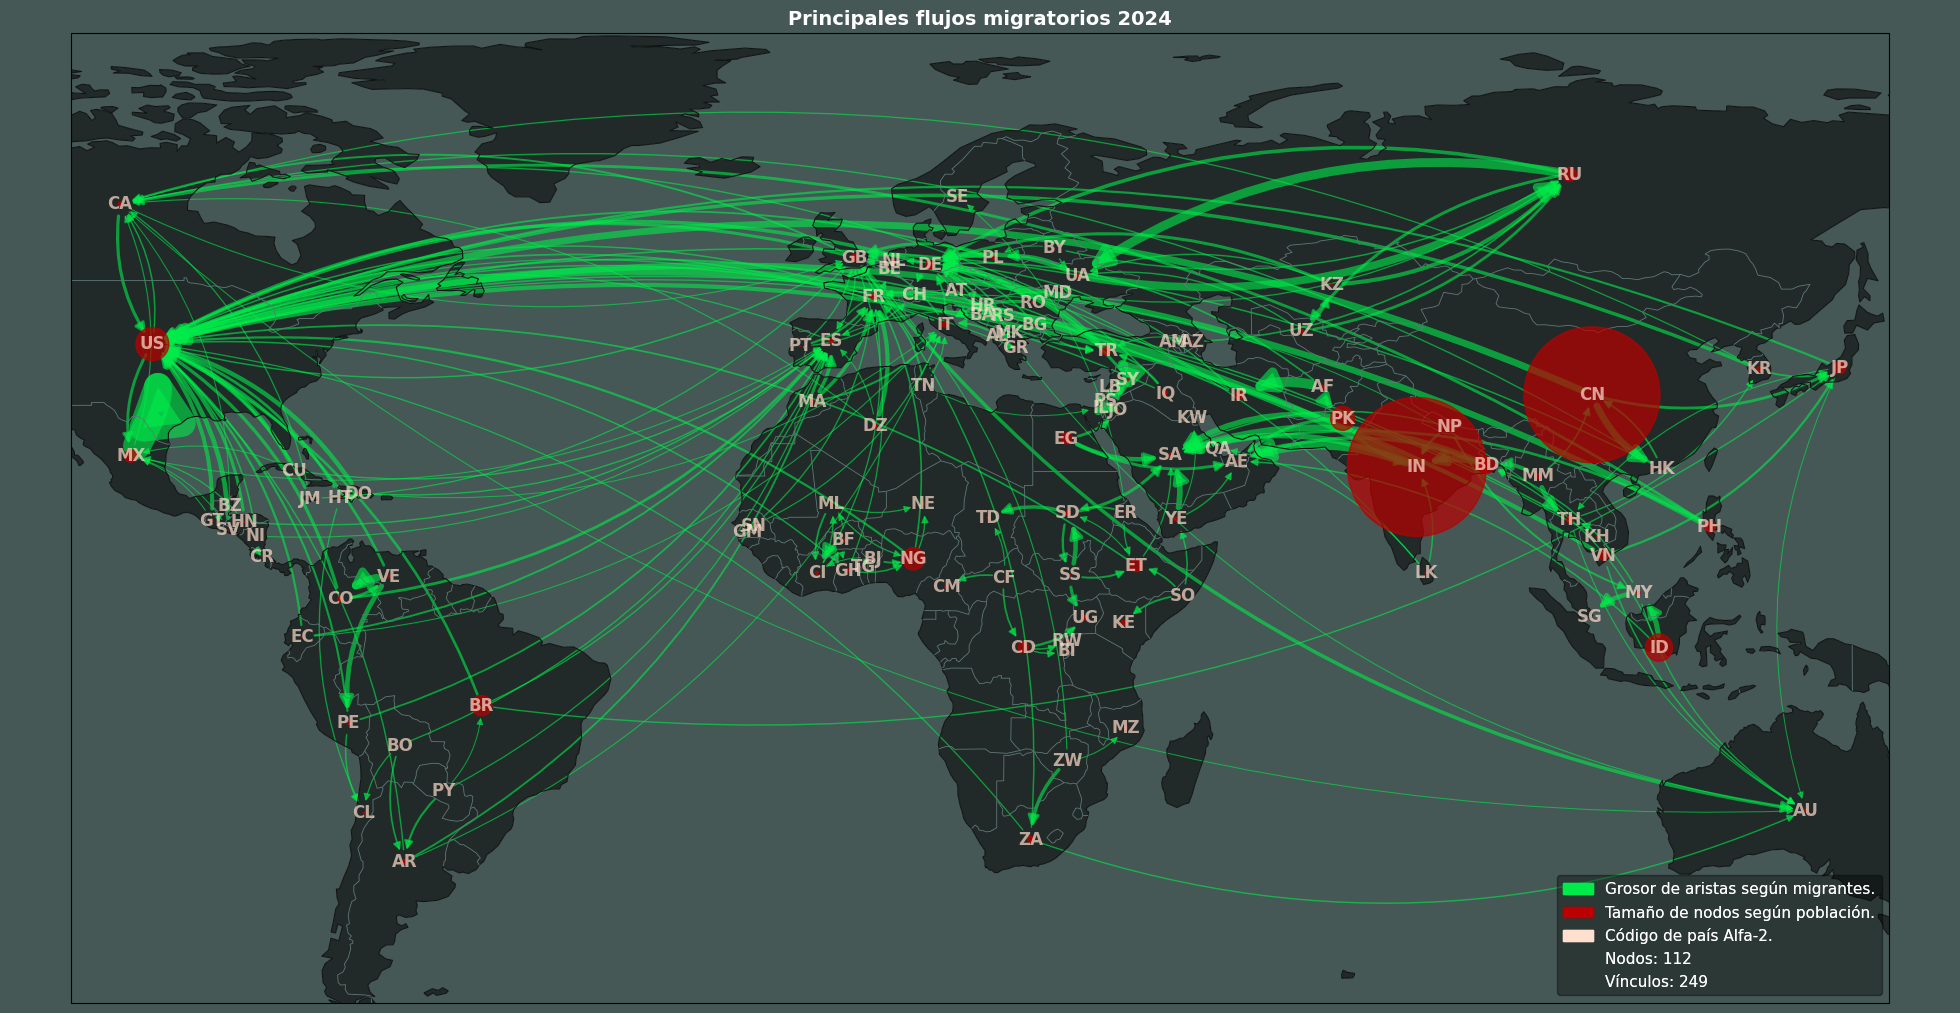

In [11]:
# Configuración de la visualización

# Tamaño del gráfico
tam_figura = (20,10)  
# Márgenes que permiten regular el zoom sobre el mapa
margen_lon = 7
margen_lat = 20
# Colores del mapa
agua = '#455856'
tierra = '#212a29'
fronteras = '#5f7976'
continentes = '#101413'
# Colores del grafo
color_titulo = '#ffffff'
color_nodos = '#ba0000'
color_aris = '#00eb4a'#5eebc1'
color_etq_pais = '#ffdfcd'#ffccaf'
# Grosor de aristas y tamaño de flechas
grosor_min, grosor_max = 0.7, 20 # rango de grosor de aristas
flecha_min, flecha_max = 10, 70 # rango de tamaño de flechas
# Tamaños de fuentes
tam_tex_etq = 12 # nodos
tam_tex_titulo = 14 # título gráfico
tam_tex_ref = 11 # referencias



# Vsualización de la red
fig = plt.figure(figsize=tam_figura)
plt.subplots_adjust(left=0.01, right=0.98, top=0.98, bottom=0.01)

# Configuración de colores
fig.set_facecolor(agua) # Color predominante (fondo)
ax = fig.add_subplot(1,1,1)
ax.set_facecolor(agua)  # Fondo interior donde se dibuja el grafo
ax.axis('off') # Remueve el marco y el color blanco dentro del grafo

# Hago zoom en la región de interés
posiciones_ingresadas = nx.get_node_attributes(grafo_verificacion, 'pos')
lons = [pos[0] for pos in posiciones_ingresadas.values()]
lats = [pos[1] for pos in posiciones_ingresadas.values()]


# Proyección
ax = plt.axes(projection=ccrs.PlateCarree())

# Extensión del mapa
ax.set_extent([
    min(lons) - margen_lon,
    max(lons) + margen_lon,
    min(lats) - margen_lat,
    max(lats) + margen_lat
], crs=ccrs.PlateCarree())

# Elementos del mapa
ax.add_feature(cfeature.LAND, facecolor=tierra)
ax.add_feature(cfeature.OCEAN, facecolor=agua)
ax.add_feature(cfeature.COASTLINE, edgecolor=continentes, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, edgecolor=fronteras, linewidth=0.6)

# Diccionario donde se guardan las coordenadas con referencia al mapa
pos_nodos = {}
for nodo in grafo_verificacion.nodes():
    lon, lat = posiciones_ingresadas[nodo]
    pos_nodos[nodo] = (lon, lat)


# NODOS
# Obtengo los pesos normalizados de cada nodo y creo la lista de tamaños (áreas)
pesos_nodos = nx.get_node_attributes(grafo_verificacion, 'weight')
tamaños = [(pesos_nodos[n]**2) for n in grafo_verificacion.nodes()]

nx.draw_networkx_nodes(
    grafo_verificacion,
    pos_nodos,
    node_size=tamaños,
    node_color=color_nodos,
    alpha=0.7,
    ax=ax,
)

# ETIQUETAS
for nodo in grafo_verificacion.nodes():
    nx.draw_networkx_labels(
        grafo_verificacion,
        pos_nodos,
        labels={nodo: nodo},
        font_color=color_etq_pais,
        font_weight='bold',
        alpha=0.7,
        font_size=tam_tex_etq,
        ax=ax,
    )

    
# ARISTAS
# Obtengo los pesos
pesos_aristas = [float(grafo_verificacion[u][v]['weight']) for u,v in grafo_verificacion.edges()]

# # Normalizo de nuevo según rangos visuales definidos en configuración de la visualización
peso_min = min(pesos_aristas)
peso_max = max(pesos_aristas)

# Normalizo de nuevo según rangos visuales definidos en configuración de la visualización
grosores = [
    grosor_min + (p - peso_min) / (peso_max - peso_min) * (grosor_max - grosor_min)
    for p in pesos_aristas
]

# Ajusto el tamaño de las flechas para que sean proporcionales al grosor de las aristas
tam_flechas = [
    flecha_min + (g - grosor_min) / (grosor_max - grosor_min) * (flecha_max - flecha_min)
    for g in grosores
]

lista_aristas = list(grafo_verificacion.edges())
nx.draw_networkx_edges(
    grafo_verificacion,
    pos_nodos,
    edgelist=lista_aristas,
    arrowsize=tam_flechas,
    width=grosores,
    edge_color=color_aris,
    alpha=.6,
    connectionstyle='arc3,rad=0.2',
    ax=ax,
    arrowstyle='-|>',
    arrows=True,
)

## REFERENCIAS (formas y colores)
# Colores y texto de las referencias
ref_nodo = mpatches.Patch(color=color_nodos, label='Tamaño de nodos según población.')
ref_flujo = mpatches.Patch(color=color_aris, label='Grosor de aristas según migrantes.')
ref_pais = mpatches.Patch(color=color_etq_pais, label='Código de país Alfa-2.')
ref_nodos = mpatches.Patch(color=(1,1,1,0), label=f'Nodos: {len(pos_nodos)}')
ref_aristas = mpatches.Patch(color=(1,1,1,0), label=f'Vínculos: {len(pesos_aristas)}')

ref1 = ax.legend(
    # title='REFERENCIAS',
    handles=[ref_flujo, ref_nodo, ref_pais, ref_nodos, ref_aristas],
    loc='lower right',
    fontsize=tam_tex_ref,
    frameon=True,
    facecolor='black',
    framealpha=0.2,
    edgecolor='black',
)
# Color del texto de los ítems
for text in ref1.get_texts():
    text.set_color('white')
# Color del título
ref1.get_title().set_color('white')
ax.add_artist(ref1)

titulo = "Principales flujos migratorios 2024"
ax.set_title(
    titulo, 
    fontsize=tam_tex_titulo,
    color=color_titulo,
    fontweight='bold',
)

plt.savefig("img_red_verificacion.png", dpi=150) 
plt.close()
display(fig)